## Time Seriess Analysis in Python

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1.Correlation of two time series

Import data:

    - Dow Jones data
    
    - UFO Sightings

In [197]:
dji=pd.read_csv('./data/DJI.csv')

In [198]:
UFO=pd.read_csv('./data/UFO.csv')

In [199]:
dji.head()

,Date,Value
0,1941,110.96
1,1942,119.40
2,1943,135.89
3,1944,152.32
4,1945,192.91


In [200]:
#rename column
dji=dji.rename(columns={"Value": "DJI"})

In [201]:
UFO.head()

,Date,Value
0,1941,1
1,1942,2
2,1943,9
3,1944,9
4,1945,9


In [202]:
#rename column
UFO=UFO.rename(columns={"Value": "UFO"})

In [203]:
#join the data
stocks_and_ufo = dji.merge(UFO, how='inner', on='Date')

In [204]:
stocks_and_ufo

,Date,DJI,UFO
0,1941,110.96,1
1,1942,119.40,2
2,1943,135.89,9
3,1944,152.32,9
4,1945,192.91,9
...,...,...,...
68,2009,10428.05,4541
69,2010,11577.51,4283
70,2011,12217.56,5107
71,2012,13104.14,7357


In [205]:
stocks_and_ufo=stocks_and_ufo.set_index('Date')

In [206]:
stocks_and_ufo

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9
...,...,...
2009,10428.05,4541
2010,11577.51,4283
2011,12217.56,5107


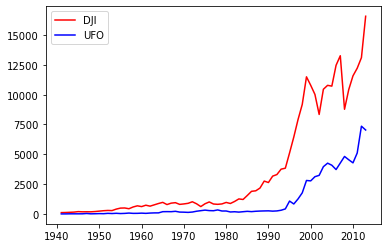

In [207]:
#plot Dow Jones data
plt.plot(stocks_and_ufo['DJI'], color = 'red', label = 'DJI')
#plot UFO
plt.plot(stocks_and_ufo['UFO'], color = 'blue',label = 'UFO')
plt.legend()
plt.show()

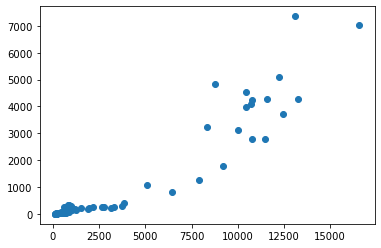

In [208]:
#scatter plot
plt.scatter(stocks_and_ufo['DJI'], stocks_and_ufo['UFO'])
plt.show()

In [209]:
# Compute the correlation
correlation1 = stocks_and_ufo['DJI'].corr(stocks_and_ufo['UFO'])
print("Correlation: ", correlation1)

Correlation:  0.9399762210726428


In [210]:
# Compute correlation of percent changes
stocks_and_ufo['DJI_per'] = stocks_and_ufo['DJI'].pct_change()
stocks_and_ufo

,DJI,UFO,DJI_per
Date,,,
1941,110.96,1,NaN
1942,119.40,2,0.076063
1943,135.89,9,0.138107
1944,152.32,9,0.120907
1945,192.91,9,0.266478
...,...,...,...
2009,10428.05,4541,0.188194
2010,11577.51,4283,0.110228
2011,12217.56,5107,0.055284


In [211]:
stocks_and_ufo['UFO_per'] = stocks_and_ufo['UFO'].pct_change()
stocks_and_ufo

,DJI,UFO,DJI_per,UFO_per
Date,,,,
1941,110.96,1,NaN,NaN
1942,119.40,2,0.076063,1.000000
1943,135.89,9,0.138107,3.500000
1944,152.32,9,0.120907,0.000000
1945,192.91,9,0.266478,0.000000
...,...,...,...,...
2009,10428.05,4541,0.188194,-0.057884
2010,11577.51,4283,0.110228,-0.056816
2011,12217.56,5107,0.055284,0.192389


In [212]:
correlation2 = stocks_and_ufo['UFO_per'].corr(stocks_and_ufo['DJI_per'])
print("Correlation of percent changes: ", correlation2)

Correlation of percent changes:  0.06026935462405373


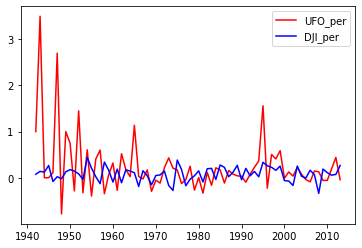

In [213]:
#plot Dow Jones data
plt.plot(stocks_and_ufo['UFO_per'], color = 'red', label = 'UFO_per')
#plot UFO
plt.plot(stocks_and_ufo['DJI_per'], color = 'blue',label = 'DJI_per')
plt.legend()
plt.show()

**Common Mistake**: Correlation of Two Trending Series

Consider two time series that are both trending. Even if the two series are totally unrelated, you could still get a very high correlation. That's why, in financial world, when you look at the correlation of say, two stocks, you should look at the correlation of their **returns**, not their levels. 

#### 2.Simple linear regressions of time series

What is a Regression?

A simple linear regression finds the slope, beta, and intercept, alpha, of a line that's the best fit between a dependent variable, y, and an independent variable, x. 

The x and y can be two time series.


A linear regression is also known as **Ordinary Least Squares**, or OLS, because it minimizes the sum of the squared distances between the data points and the regression line.

In [214]:
#1.import 2 time series financial datasets - 'AMZN' and 'MSFT'
#2.rename
#3.join
#4.change index
x=pd.read_csv('./data/AMZN.csv')
y=pd.read_csv('./data/MSFT.csv')

In [215]:
x.head()

,Date,Adj Close
0,5/15/1997,1.958333
1,5/16/1997,1.729167
2,5/19/1997,1.708333
3,5/20/1997,1.635417
4,5/21/1997,1.427083


In [216]:
y.head()

,Date,Adj Close
0,8/6/2012,26.107651
1,8/7/2012,26.377876
2,8/8/2012,26.438896
3,8/9/2012,26.587088
4,8/10/2012,26.517351


In [217]:
x=x.rename(columns={"Adj Close": "AMZN"})

In [218]:
y=y.rename(columns={"Adj Close": "MSFT"})

In [219]:
df = x.merge(y, how='inner', on='Date')

In [220]:
df.shape

(1256, 3)

In [221]:
df=df.set_index('Date')

In [222]:
df

,AMZN,MSFT
Date,,
8/6/2012,233.990005,26.107651
8/7/2012,236.559998,26.377876
8/8/2012,234.380005,26.438896
8/9/2012,234.059998,26.587088
8/10/2012,232.750000,26.517351
...,...,...
7/27/2017,1046.000000,73.160004
7/28/2017,1020.039978,73.040001
7/31/2017,987.780029,72.699997


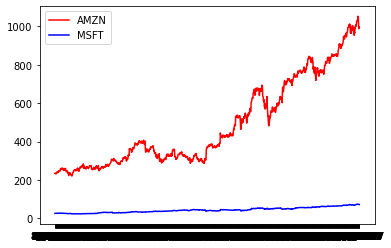

In [223]:
#plot Dow Jones data
plt.plot(df['AMZN'], color = 'red', label = 'AMZN')
#plot UFO
plt.plot(df['MSFT'], color = 'blue',label = 'MSFT')
plt.legend()
plt.show()

Let's **regress** the returns of MSFT **on** the returns of AMZN
 - so MSFT's return is y, AMZN's return is x

In [224]:
# Import the statsmodels module
import statsmodels.api as sm

In [225]:
# Compute percentage changes in both series
df['MSFT_per'] = df['MSFT'].pct_change()
df['AMZN_per'] = df['AMZN'].pct_change()

In [226]:
df

,AMZN,MSFT,MSFT_per,AMZN_per
Date,,,,
8/6/2012,233.990005,26.107651,NaN,NaN
8/7/2012,236.559998,26.377876,0.010350,0.010983
8/8/2012,234.380005,26.438896,0.002313,-0.009215
8/9/2012,234.059998,26.587088,0.005605,-0.001365
8/10/2012,232.750000,26.517351,-0.002623,-0.005597
...,...,...,...,...
7/27/2017,1046.000000,73.160004,-0.012019,-0.006459
7/28/2017,1020.039978,73.040001,-0.001640,-0.024818
7/31/2017,987.780029,72.699997,-0.004655,-0.031626


- drop the first row

Notice that the first row of the return series is NaN. Each return is computed from two prices, so there is one less return than price. To delete the first row of NaN's, use the pandas method "dropna".

In [227]:
df = df.dropna()

In [228]:
df

,AMZN,MSFT,MSFT_per,AMZN_per
Date,,,,
8/7/2012,236.559998,26.377876,0.010350,0.010983
8/8/2012,234.380005,26.438896,0.002313,-0.009215
8/9/2012,234.059998,26.587088,0.005605,-0.001365
8/10/2012,232.750000,26.517351,-0.002623,-0.005597
8/13/2012,232.440002,26.491201,-0.000986,-0.001332
...,...,...,...,...
7/27/2017,1046.000000,73.160004,-0.012019,-0.006459
7/28/2017,1020.039978,73.040001,-0.001640,-0.024818
7/31/2017,987.780029,72.699997,-0.004655,-0.031626


- Create a constant

You need to add a column of ones as a dependent, right hand side variable. The reason you have to do this is because the regression function assumes that if there is no constant column, then you want to run the regression without an intercept. By adding a column of ones, statsmodels will compute the regression coefficient of that column as well, which can be interpreted as the intercept of the line. The statsmodels method "add constant" is a simple way to add a constant.

In [229]:
df = sm.add_constant(df)
df

,const,AMZN,MSFT,MSFT_per,AMZN_per
Date,,,,,
8/7/2012,1.0,236.559998,26.377876,0.010350,0.010983
8/8/2012,1.0,234.380005,26.438896,0.002313,-0.009215
8/9/2012,1.0,234.059998,26.587088,0.005605,-0.001365
8/10/2012,1.0,232.750000,26.517351,-0.002623,-0.005597
8/13/2012,1.0,232.440002,26.491201,-0.000986,-0.001332
...,...,...,...,...,...
7/27/2017,1.0,1046.000000,73.160004,-0.012019,-0.006459
7/28/2017,1.0,1020.039978,73.040001,-0.001640,-0.024818
7/31/2017,1.0,987.780029,72.699997,-0.004655,-0.031626


- Run regression

The first argument of the statsmodel regression is the series that represents the dependent variable, y, and the next argument contains the independent variable or variables. In this case, the dependent variable is MSFT_per's return and the independent variables are the constant and AMZN_per's return. The method "fit" runs the regression and results are saved in a class instance called results.

In [230]:
# Regress y on dfx1
result = sm.OLS(df['MSFT_per'],df[['const','AMZN_per']]).fit()

In [231]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MSFT_per   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           6.99e-44
Time:                        17:59:30   Log-Likelihood:                 3656.5
No. Observations:                1255   AIC:                            -7309.
Df Residuals:                    1253   BIC:                            -7299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.410      0.1

In [232]:
intercept=result.params[0]
print(intercept)
slope=result.params[1]
print(slope)

0.0005247197315760164
0.29329774045160534


- the coefficent is the slope of the regression, which is also referred to as beta
- The R-squared measures how well the linear regression line fits the data
- The magnitude of the correlation is the square root of the R-squared
- And the sign of the correlation is the sign of the slope of the regression line

In [233]:
#correlation
correlation = df['AMZN_per'].corr(df['MSFT_per'])
print("Correlation of percent changes: ", correlation)

Correlation of percent changes:  0.3779097662857761


In [234]:
#square root of the R-squared
np.sqrt(0.143)

0.3781534080237807

#### 3.Autocorrelation

**Autocorrelation** is the correlation of a single time series with a lagged copy of itself. It's also called "serial correlation".

Often, when we refer to a series's autocorrelation, we mean the **"lag-one" autocorrelation.**

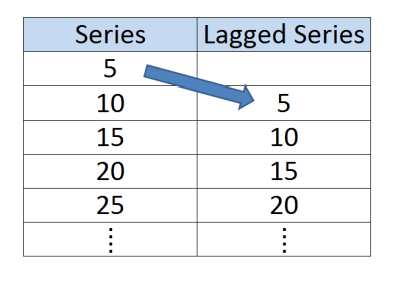


- Mean Reversion: Negative Autocorrelation

With financial time series, when **returns** have a negative autocorrelation, we say it is "mean reverting".
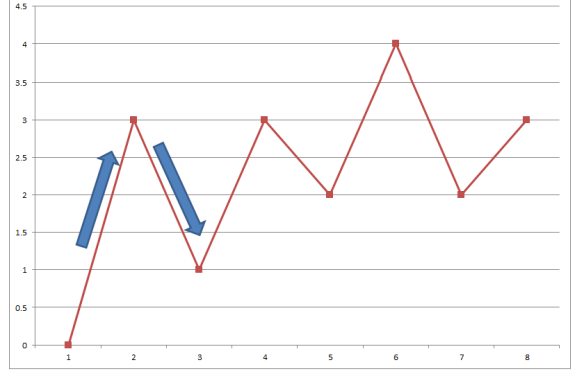


- Momentum or Trend Following: Postitive Autocorrelation

Alternatively, if a series has positive autocorrelation, we say it is "trend-following".

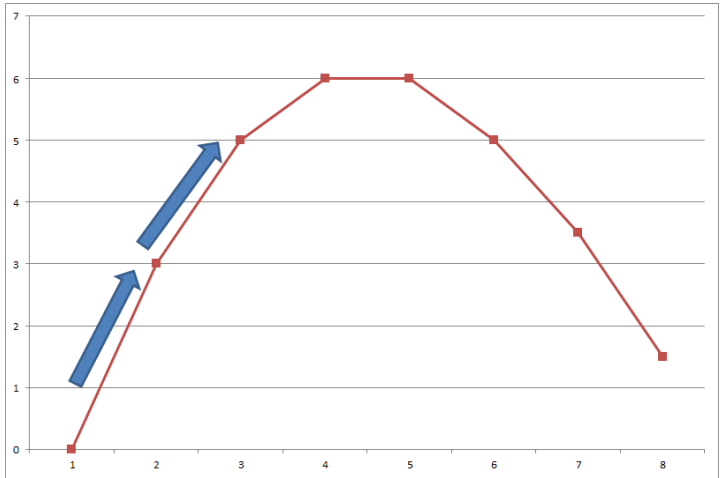

**Traders Use Autocorrelation to Make Money**

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as **mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week**. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

*Let's look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017.*

In [235]:
MSFT=pd.read_csv('./data/MSFT.csv')
MSFT.head()

,Date,Adj Close
0,8/6/2012,26.107651
1,8/7/2012,26.377876
2,8/8/2012,26.438896
3,8/9/2012,26.587088
4,8/10/2012,26.517351


In [236]:
#convert index to datetime
MSFT=MSFT.set_index('Date')
MSFT.index=pd.to_datetime(MSFT.index)
MSFT.head(20)

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351
2012-08-13,26.491201
2012-08-14,26.438549
2012-08-15,26.499977
2012-08-16,27.008911


In [237]:
#df.resample() is a convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index
MSFT_w=MSFT.resample(rule='W')

In [238]:
#df.resample() didn't returna dataframe, instead it returns a DatetimeIndexResampler object which is more groupby-like
type(MSFT_w)

pandas.core.resample.DatetimeIndexResampler

In [239]:
#df.last(): select final periods of time series data based on a date offset
MSFT_w=MSFT_w.last()

In [240]:
MSFT_w

,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091
...,...
2017-07-09,69.459999
2017-07-16,72.779999
2017-07-23,73.790001


In [241]:
#create a new DataFrame returns which has percent changes in weekly prices using the .pct_change() method.
returns = MSFT_w.pct_change()

In [242]:
returns

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218
...,...
2017-07-09,0.007689
2017-07-16,0.047797
2017-07-23,0.013877


In [243]:
#Compute the autocorrelation using the .autocorr() method on the series of closing stock prices, which is the column 'Adj Close'
#Series.autocorr(lag=1): This method computes the Pearson correlation between the Series and its shifted self.
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


#### 4.Autocorrelation Function
- The autocorrelation function (ACF) defines how data points in a time series are related, on average, to the preceding data points. In other words, it is the autocorrelation as a function of the lag
- equals one at lag-zero

In [244]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
#acf is to calculate the autocorrelation function
#plot_acf is the statsmodels function for plotting the autocorrelation function

Quarterly earnings for H&R Block:

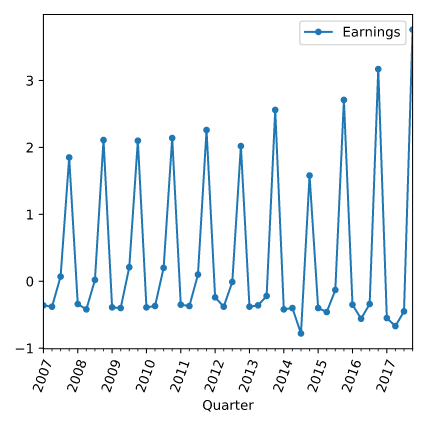

Let's compute the array of autocorrelations for the H&R Block quarterly earnings from HRB. Then, plot the autocorrelation function using the plot_acf module

In [245]:
HRB=pd.read_csv('./data/HRB.csv', index_col=0)
HRB.head(20)

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34
2008Q2,-0.42
2008Q3,0.02
2008Q4,2.11
2009Q1,-0.39


In [246]:
# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


C:\Users\kangd\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\kangd\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


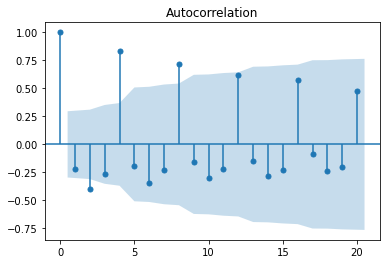

In [247]:
# Plot the acf function
plot_acf(HRB, alpha=0.05, lags=20)
plt.show()
#the argument alpha determines the width of the confidence intervals


If the autocorrelation coefficient is in the confidence interval, it is regarded as not statistically significant. Therefore, the user should focus on the values where the value of the ACF is outside the confidence interval.

#### 5.White Noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed.

- Constant mean with time
    
- Constant variance with time
    
- Zero autocorrelatios at all lags

In [248]:
#Generate a white noise by drawing random samples from a normal (Gaussian) distribution.
noise=np.random.normal(loc=0, scale=1, size=500)

In [249]:
np.mean(noise)

0.0728859210497271

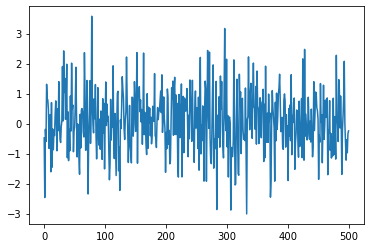

In [250]:
plt.plot(noise)

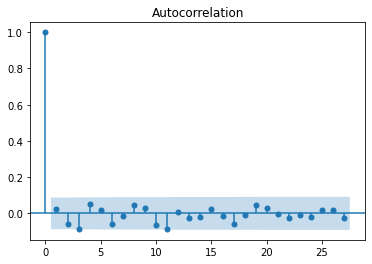

In [251]:
#autocorrelation of White Noise
plot_acf(noise)
plt.show()

Stock Market **Returns** are close to White Noise
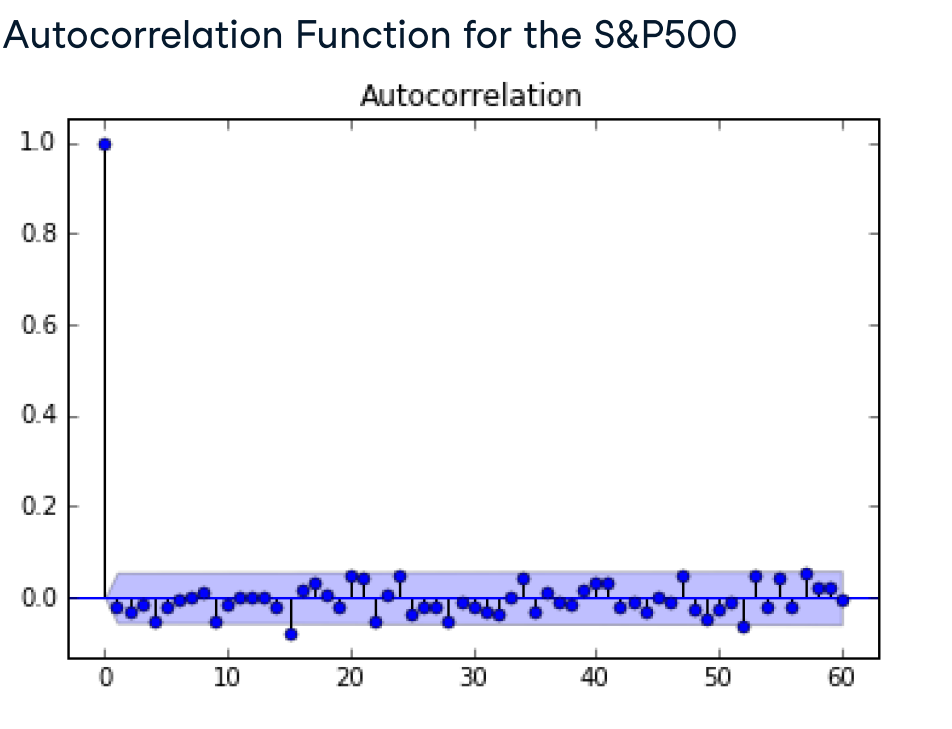

#### 6.Random Walk

A random walk is the process by which randomly-moving objects wander away from where they started.

In financial world, random walk means today's price is equal to yesterday's price plus some noise:
    

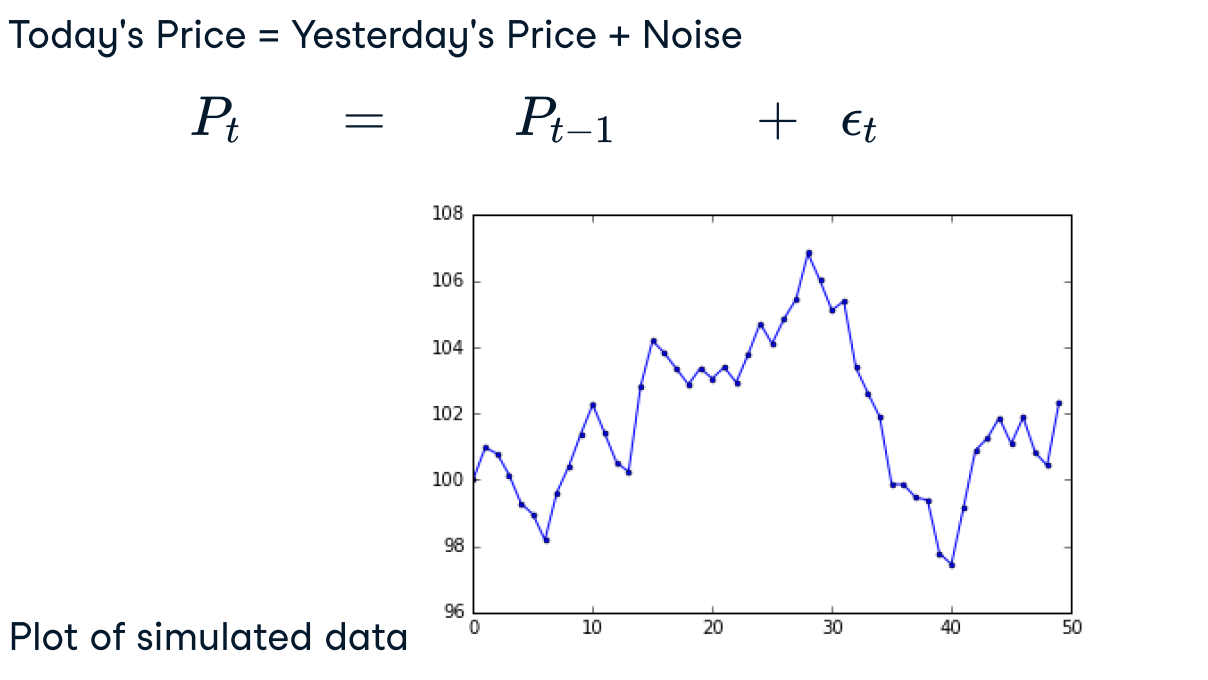
    
    

Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk.

Random walk theory suggests that changes in stock prices have the same distribution and are independent of each other. Therefore, it assumes the past movement or trend of a stock price or market cannot be used to predict its future movement. In short, random walk theory proclaims that stocks take a random and unpredictable path that makes all methods of predicting stock prices futile in the long run.

In [252]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1.0, size=500)
#the argument for the mean is loc and the argument for the standard deviation is scale

In [253]:
# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

In [254]:
#Simulate stock prices, P with a starting price of 100
#Cumulate the random steps using the numpy .cumsum() method
P = 100 + np.cumsum(steps)

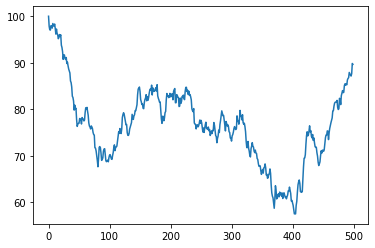

In [255]:
plt.plot(P)

Let's look at a random walk with a **drift**. 

Many time series, like stock prices, are random walks but tend to drift up over time.

In a random walk with drift, prices on average drift by mu every period. And the change in price for a random walk with drift is still white noise but with a mean of mu. So if we now think of stock prices as a random walk with drift, then the returns are still white noise, but with an average return of mu instead of zero.

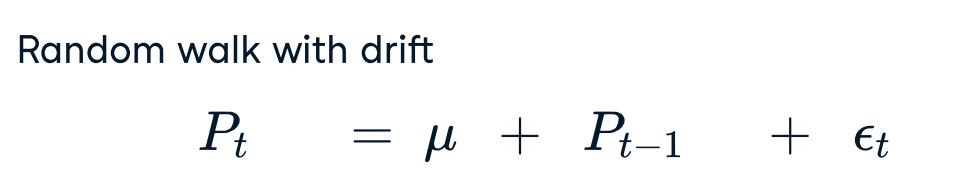


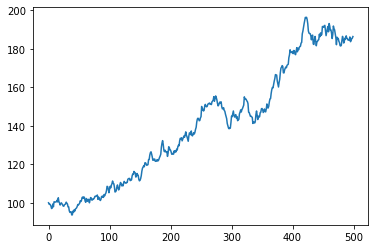

In [256]:
# Generate 500 random steps 
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)

**Summary:**
   - random-walk-without-drift model assumes that, at each point in time, the series merely takes a random step away from its last recorded position, with steps whose mean value is zero. 
   - random-walk-with-drif model assumes that the mean step size is some nonzero value mu

Most stock prices follow a random walk (perhaps with a drift). Let's use MSFT stock price as an example

We can use **Augmented Dickey-Fuller(ADF) test** to test whether a given time series is stationary or not, in other words, whether the data follows a random walk.

[package: statsmodels.tsa.stattools.adfuller](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)

In [257]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

In [258]:
# Run the ADF test on the price series and print out the results
results = adfuller(MSFT['Adj Close'])
print(results)

(0.1800617784153416, 0.9711208852369689, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 2279.300324698148)


In [259]:
# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 0.9711208852369689


With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

*Therefore, MSFT stock price follows a random walk*

How about MSFT's stock return?

In [260]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
MSFT_per = MSFT.pct_change()

# Eliminate the NaN in the first row of returns
MSFT_per = MSFT_per.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(MSFT_per['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 1.729101493944146e-29


*Therefore, MSFT stock return doesn't follow a random walk*

#### 7.Stationarity

- Strong stationarity: it means that the joint distribution of the observations do not depend on time

- Weak stationarity: it means that the mean, variance, and autocorrelations of the observations do not depend on time.

**Stationary is very important factor on time series because If a process is not stationary, then it becomes difficult to model.**

So stationarity is necessary for a parsimonious model, one with a smaller set of parameters to estimate.


- A random walk is a common type of non-stationary series. The variance grows with time.

- Seasonal series are also non-stationary

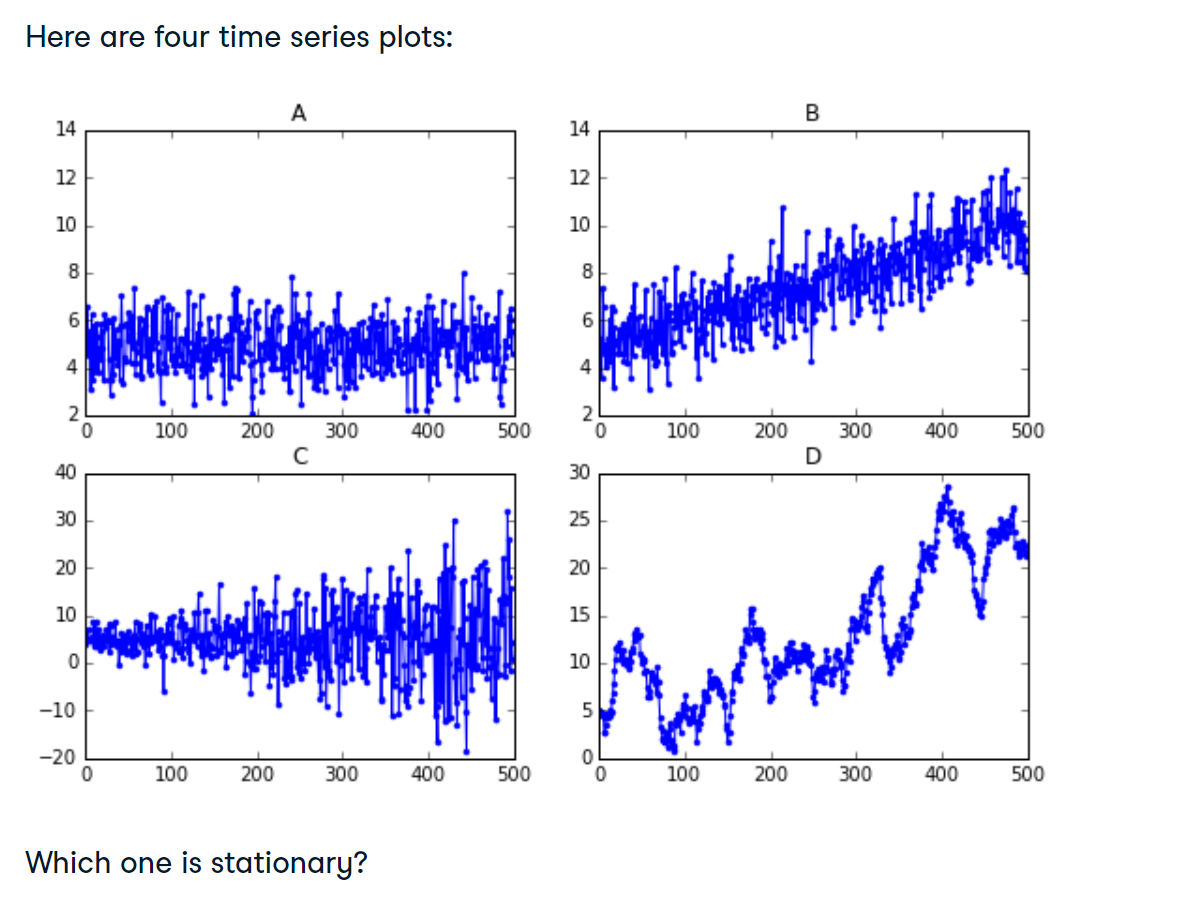



A

**Many non-stationary series can be made stationary through a simple transformation.**


For example, we have the quarterly earnings for H&R Block, which has a large seasonal component and is therefore not stationary. If we take the seasonal difference, by taking the difference with lag of 4, the transformed series looks stationary

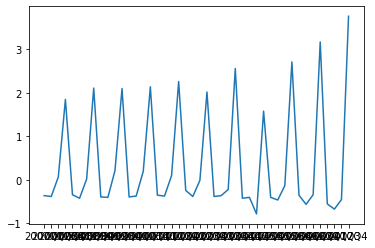

In [261]:
plt.plot(HRB)

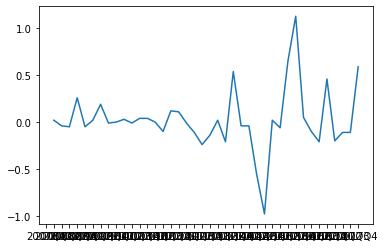

In [262]:
plt.plot(HRB.diff(4))
#df.diff() calculates the difference of a Dataframe element compared with another element in the 
#Dataframe(default is element in previous row).